In [2]:
import psycopg2 as pg

In [3]:
connection = pg.connect(dbname = 'postgres', host = 'localhost', user ='postgres', password = '123456', port =5432)
cursor = connection.cursor()

In [4]:
import pandas as pd
transactions = pd.read_excel(io='data.xlsx', sheet_name=0)
transactions.head()

C:\Users\honor\AppData\Local\Temp\ipykernel_7284\2366785250.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [22]:
uniqueBrands = list(transactions['brand'].unique())
uniqueBrands_string = list(map(lambda x: "('Undefined')" if pd.isna(x) else "('{}')".format(x), uniqueBrands))
uniqueBrands_string

["('Solex')",
 "('Trek Bicycles')",
 "('OHM Cycles')",
 "('Norco Bicycles')",
 "('Giant Bicycles')",
 "('WeareA2B')",
 "('Undefined')"]

In [24]:
brands = ','.join(uniqueBrands_string)
insertBrands = "INSERT INTO brand (brand_name) VALUES " + brands

cursor.execute(insertBrands)
connection.commit()

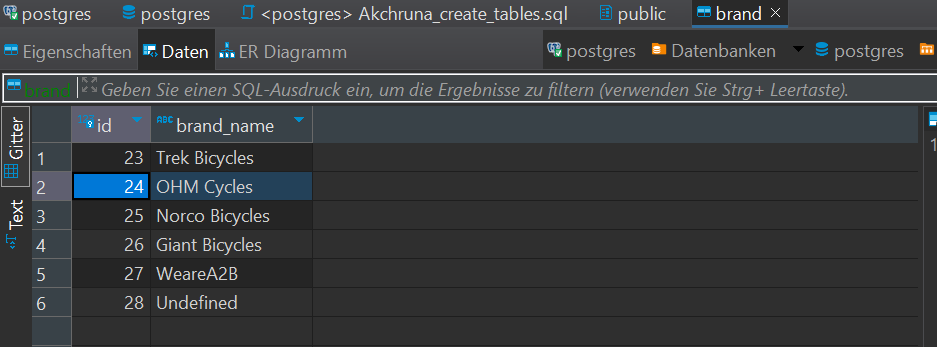

In [26]:
uniqueStatuses= list(transactions['order_status'].unique())
uniqueStatuses_string = list(map(lambda x: "('Undefined')" if pd.isna(x) else "('{}')".format(x), uniqueStatuses))
uniqueStatuses_string

["('Approved')", "('Cancelled')"]

In [27]:
statuses = ','.join(uniqueStatuses_string)
insertStatuses = "INSERT INTO transaction_status (status_name) VALUES " + statuses

cursor.execute(insertStatuses)
connection.commit()

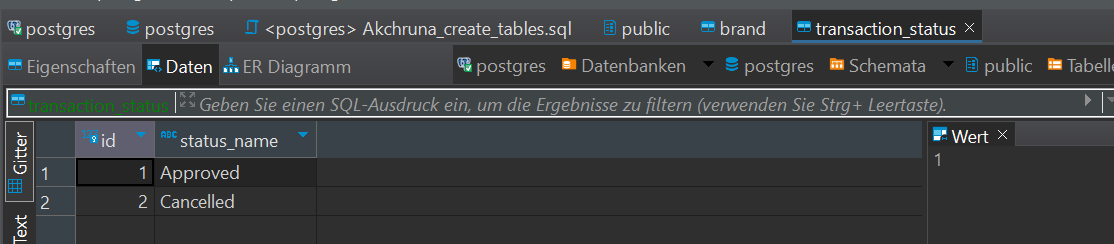

In [5]:
uniqueProductLines = list(transactions['product_line'].unique())
uniqueProductLines_string = list(map(lambda x: "('Undefined')" if pd.isna(x) else "('{}')".format(x), uniqueProductLines))
uniqueProductLines_string

["('Standard')", "('Road')", "('Mountain')", "('Touring')", "('Undefined')"]

In [6]:
productLines = ','.join(uniqueProductLines_string)
insertProductLines = "INSERT INTO line_type (line_name) VALUES " + productLines

cursor.execute(insertProductLines)
connection.commit()

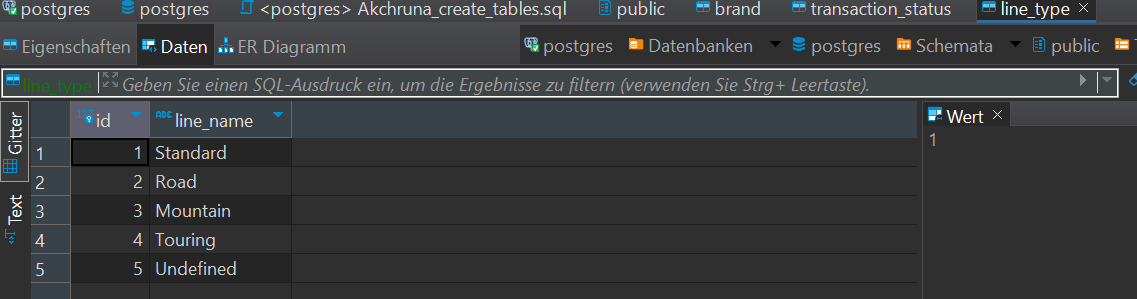

Далее по аналогии заполнены остальные справочники